## Урок 4. Домашнее задание. 
## Тематическое моделирование. EM-алгоритм

1. объединить в одну выборку (это только для твитов), для роспотребнадзора сформировать датасет из вопросов
2. провести исследование и выявить тематики о которых говорят в твитах (для твитов), а для роспотребнадзора так же выявить тематики о которых люди пишут проанализировать
3. сделать визуализацию кластеров тематик
4. проинтерпритировать получившиеся тематики

In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 1.9 MB/s 
     |████████████████████████████████| 8.2 MB 8.2 MB/s 


In [ ]:
import requests
from bs4 import BeautifulSoup 
import time
from urllib.parse import urlparse, urljoin
from tqdm.notebook import tqdm

import pandas as pd
import numpy as np
import re
import string
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
## найти id каждого вопроса на страницах
# ячейка в колабе не работает
page = 1
main_url = 'https://zpp.rospotrebnadzor.ru/Forum/Appeals/AjaxindexList?page={page}&searchtext=&categories=[]'

def ids_from_page(soup):
    return [i.get('href') for i  in soup.findAll('a', {'class':'appeal-title-link'})]
    
urls = []
for page in tqdm(range(1, 500), desc='Pages'):
    time.sleep(0.5)
    res = requests.get(main_url.format(page=page))  
    soup = BeautifulSoup(res.text)
    urls.extend(ids_from_page(soup))

In [ ]:
## имея id запросов достанем тексты на страницах
# ячейка в колабе не работает
domain = 'https://zpp.rospotrebnadzor.ru'

def get_text_page_question(soup):
    return soup.findAll('p', {'class':'appeal-details-message'})[0].text
def get_text_page_answer(soup):
    return soup.findAll('p', {'class':'appeal-comments-message'})[0].text

question = []
answer = []

for url in tqdm(urls, desc='Pages'):
    time.sleep(0.5)
    res = requests.get(urljoin(domain, url))  
    soup = BeautifulSoup(res.text)
    
    question.append(get_text_page_question(soup))
    try:
        answer.append(get_text_page_answer(soup))
    except:
        answer.append('No answer')

In [ ]:
# df = pd.DataFrame(list(zip(question, answer)), columns=['question','answer'])
df = pd.DataFrame(question, columns=['question'])

In [ ]:
df.to_csv('rospotrebnadzor.csv', index=False)

In [ ]:
df = pd.read_csv('rospotrebnadzor.csv')

In [ ]:
df

,question
0,"Я Ошуркова Елена Сергеевна,проживающая по адре..."
1,Добрый день!\r\n\r\nОсновной ворос - Является ...
2,9 июля 2022 года при совершении покупки в мага...
3,Здравствуйте!\r\nВ мае 2021 года был куплен би...
4,Добрый день. \r\n02.05.2022 в приложении Wildb...
...,...
2490,Здравствуйте в онлацн магазине г. НОВЫЙ УРЕНГО...
2491,Прошу разьяснить правила для не привитых от CO...
2492,"Заказала товар на сайте storebrick.ru, оплатил..."
2493,"В магазине «Мечта» по адресу: РТ, пос. совхоза..."


In [ ]:
nltk.download('stopwords')
words_regex = re.compile('\w+')
morph = MorphAnalyzer()
my_stopwords = ['здравствуйте', 'добрый', 'день', 'вопрос', 'роспотребнадзор', 'либо', 'месяц', 
                'течение', 'данный', 'это', 'просить', 'сказать', 'год', 'адрес', 'обращение', 'мочь', 'иметь', 'человек',
                'право', 'санкт' ,'петербург']

def find_words(text, regex = words_regex):
    tokens =  regex.findall(text.lower())
    return [w for w in tokens if w.isalpha() and len(w) >= 3]


stopwords_list = stopwords.words('russian') + my_stopwords

# mystem = Mystem()
# def lemmatize(words, lemmer = mystem, stopwords = stopwords_list):
#     lemmas = lemmer.lemmatize(' '.join(words))
#     return [w for w in lemmas if not w in stopwords 
#             and w.isalpha()]

def lemmatize(words, lemmer = morph, stopwords = stopwords_list):
    lemmas = [lemmer.parse(w)[0].normal_form for w in words]
    return [w for w in lemmas if not w in stopwords 
            and w.isalpha()]

def preprocess(text):
    return (lemmatize(find_words(text)))

<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: Dep

In [ ]:
df.question.iloc[1]

'Добрый день!\r\n\r\nОсновной ворос - Является ли газовый котел и газовая колонка технически сложными товарами? В новых перечнях нет уточнения насчет газовых котлов, только панели, поврехности и духовые шкафы.\r\nВторичный вопрос - могу ли я обменять нераспечатанный котел и колонку в течение двух недель по 25 ст ЗоЗПП?'

In [ ]:
print(preprocess(df.question.iloc[1]))

['основной', 'вороса', 'являться', 'газовый', 'котёл', 'газовый', 'колонка', 'технически', 'сложный', 'товар', 'новый', 'перечень', 'уточнение', 'насчёт', 'газовый', 'котёл', 'панель', 'поврехность', 'духовой', 'шкаф', 'вторичный', 'обменять', 'нераспечатанный', 'котёл', 'колонка', 'неделя', 'зозппа']


In [ ]:
preprocessed_text = list(tqdm(map(preprocess, df['question']), total=len(df)))

  0%|          | 0/2495 [00:00<?, ?it/s]

In [ ]:
df['preprocessed_text'] = preprocessed_text
df.sample(3)

,question,preprocessed_text
830,Добрый вечер.\r\n24.02.22 вернула три посылки ...,"[вечер, вернуть, посылка, посылка, товар, инте..."
2133,"Здравствуйте! Подрядчик ООО Домокон, адрес: 65...","[подрядчик, ооо, домокно, кемеровский, обл, но..."
2198,"Мною была заказана зубная паста Weleda, котора...","[заказать, зубной, паста, weleda, который, пол..."


## Модель LDA


Первая модель, которую мы рассмотрим, LDA - латентное размещение Дирихле. Воспользуемся реализацией из библиотеки gensim.

In [ ]:
!pip install -U gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 3.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from gensim.models import *
from gensim import corpora

In [ ]:
dictionary = corpora.Dictionary(df['preprocessed_text'])

dictionary.filter_extremes(no_below = 10, no_above = 0.9, keep_n=None) # игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря 
dictionary.save('rospotrebnadzor.dict')

In [ ]:
corpus = [dictionary.doc2bow(text) for text in df['preprocessed_text']]
corpora.MmCorpus.serialize('rospotrebnadzor.model', corpus)

In [ ]:
%time lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=10, chunksize=50, update_every=1, passes=2)

CPU times: user 1.95 s, sys: 17.9 ms, total: 1.97 s
Wall time: 1.97 s


In [ ]:
lda.show_topics(num_topics=10, num_words=10, formatted=True)

[(0,
  '0.042*"услуга" + 0.035*"банк" + 0.025*"договор" + 0.022*"карта" + 0.020*"вакцинация" + 0.017*"руб" + 0.016*"covid" + 0.015*"пользователь" + 0.014*"медицинский" + 0.014*"объяснить"'),
 (1,
  '0.030*"ребёнок" + 0.018*"декабрь" + 0.018*"хотеть" + 0.016*"который" + 0.015*"сделать" + 0.012*"гражданин" + 0.012*"фото" + 0.011*"принять" + 0.010*"мера" + 0.009*"разобраться"'),
 (2,
  '0.064*"магазин" + 0.060*"товар" + 0.054*"возврат" + 0.037*"средство" + 0.022*"вернуть" + 0.022*"денежный" + 0.021*"приобрести" + 0.014*"срок" + 0.013*"электронный" + 0.012*"ноябрь"'),
 (3,
  '0.074*"продавец" + 0.042*"деньга" + 0.041*"товар" + 0.037*"магазин" + 0.036*"вернуть" + 0.027*"цена" + 0.024*"купить" + 0.020*"оказаться" + 0.020*"попросить" + 0.017*"обратиться"'),
 (4,
  '0.064*"заказ" + 0.032*"товар" + 0.029*"доставка" + 0.026*"сайт" + 0.022*"получить" + 0.020*"деньга" + 0.019*"интернет" + 0.019*"оплатить" + 0.016*"прийти" + 0.014*"сообщение"'),
 (5,
  '0.061*"дом" + 0.019*"квартира" + 0.017*"наш" 

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=8e9128e31870605c96c0fca2388b2e60e927586798c49b6ceeeca69ddbfe1911
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
%time vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


CPU times: user 675 ms, sys: 40.1 ms, total: 715 ms
Wall time: 2.55 s


Заносить слова в стоп-лист можно бесконечно))

In [ ]:
print('Персплексия: ', np.exp(lda.log_perplexity(corpus)))

Персплексия:  0.0008404784915264545


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
CoherenceModel(model=lda, texts=df['preprocessed_text'], dictionary=dictionary, coherence='u_mass').get_coherence()

-4.136846694642395

  0%|          | 0/23 [00:00<?, ?it/s]

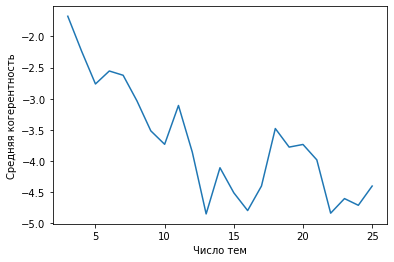

In [ ]:
topics_list = list(range(3, 26))
coherences = []

for num in tqdm(topics_list):
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=150, update_every=1, passes=3)
    coherences.append(CoherenceModel(model=lda, texts=df['preprocessed_text'], dictionary=dictionary, coherence='u_mass').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

Выбираю оптимальным делить вопросы на 6 тем.

In [ ]:
lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=6, chunksize=50, update_every=1, passes=2)
vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
vis_data.topic_info.Category

,Term,Freq,Total,Category,logprob,loglift
53,товар,1783.000000,1783.000000,Default,30.0000,30.0000
16,магазин,1446.000000,1446.000000,Default,29.0000,29.0000
152,средство,771.000000,771.000000,Default,28.0000,28.0000
122,услуга,700.000000,700.000000,Default,27.0000,27.0000
3,возврат,1048.000000,1048.000000,Default,26.0000,26.0000
...,...,...,...,...,...,...
136,который,151.914407,974.700452,Topic6,-4.3300,0.4656
161,закон,88.731719,203.937683,Topic6,-4.8677,1.4922
173,потребитель,98.284148,341.757688,Topic6,-4.7654,1.0782
162,защита,81.049066,209.013752,Topic6,-4.9582,1.3771


In [ ]:
topic_names_list = vis_data.topic_info.Category.unique()
topic_names_list

array(['Default', 'Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5',
       'Topic6'], dtype=object)

In [ ]:
for topic_name in topic_names_list[1:]:
  print(list(vis_data.topic_info.loc[vis_data.topic_info.Category == topic_name].Term[:8]))

['результат', 'нарушение', 'код', 'хотя', 'час', 'машина', 'мастер', 'никто']
['товар', 'продавец', 'заказ', 'доставка', 'цена', 'являться', 'покупка', 'выдача']
['электронный', 'ноябрь', 'справка', 'тур', 'билет', 'отменить', 'ковид', 'заявление']
['хотеть', 'акт', 'вода', 'лицо', 'сертификат', 'гарантия', 'улица', 'предоплата']
['договор', 'декабрь', 'область', 'площадка', 'пользоваться', 'заключить', 'управлять', 'втб']
['ребёнок', 'тест', 'вакцинация', 'правило', 'пцр', 'гражданин', 'санитарный', 'covid']


Интерпретация:

1. Сложно подобрать тему.
2. Вопросы связанные с заказами и доставкой товаров
3. Вопросы связанные с отменой туров/поездок из-за ковида
4. Вопросы связанные в водой, подключением к водоснабжению, гарантией на услуги подключения.
5. Вопросы связанные с заключением договором, возможно по коммуналке.
6. Вопросы связанные с вакцинацией детей и взятие тестов ПЦР.